# Results of analysis

Reading LiME_Binning output

In [55]:
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t25.txt"
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_1+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_2+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_1+RC.fasta.a16.t25.txt"
file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t40.txt"


Paired = True

if Paired:
    threshold = 40
    
else:
    threshold = 20

In [56]:
f = open(file, "r")

In [57]:
l = []
for x in f:
    l.append(int(x))

f.close()
print("number of reads: ", len(l))

max_val = max(l)

s = []
for x in range(0, max_val+1):
    s.append(0)
    
print("number of clusters: ", len(s))

for i in range(0, len(l)):
    temp = l[i]
    s[temp] = s[temp] + 1


max_set_size = max(s)

max_set = s.index(max_set_size)
print("max set size: ", max_set_size)
print("max set index: ", max_set)

count=0;
for i in range(0, len(s)):
    if s[i]==1:
        count=count + 1

print("number of non grouped reads: ", count)

sorted_s = s

sorted_s.sort(reverse=True)

print("Sizes of ten largest sets:")
for i in range(0, 10):
    print(sorted_s[i])

number of reads:  3125000
number of clusters:  143334
max set size:  796125
max set index:  419
number of non grouped reads:  44627
Sizes of ten largest sets:
796125
62500
62500
62500
62500
62500
62500
62500
62500
62500


In [58]:
cluster_dict = {}

for cluster in l:
    
    if cluster in cluster_dict.keys():
        cluster_dict[cluster] = cluster_dict[cluster] + 1 
    
    else:
        cluster_dict[cluster] = 1

print("len cluster dict: ", len(cluster_dict))

sorted_tuples = sorted(cluster_dict.items(), key=lambda item: item[1], reverse = True)

sorted_dict = {k: v for k, v in sorted_tuples}

len cluster dict:  143334


In [59]:
k = 20 

top_k_cluster = []

i = 0
for cluster, cardinality in sorted_dict.items():
    
    if i <= k:
        top_k_cluster.append([cluster, cardinality])
    
    else:
        break
        
    i = i + 1
    
print(top_k_cluster)

[[419, 796125], [143324, 62500], [143325, 62500], [143326, 62500], [143327, 62500], [143328, 62500], [143329, 62500], [143330, 62500], [143331, 62500], [143332, 62500], [143333, 62500], [9875, 24370], [58329, 21791], [45621, 14071], [58334, 8844], [9876, 6761], [9874, 6751], [58328, 6309], [9872, 5400], [9879, 3757], [78064, 3642]]


In [60]:
import matplotlib.pyplot as plt

def plotALot(cluster_to_show,threshold):

    x = []
    y = []

    for i in range(len(cluster_to_show)):
        x.append(str(cluster_to_show[i][0]))
        y.append(cluster_to_show[i][1])


    plt.figure(figsize=(15,10))
    width = 0.4
    plt.bar(x,y,width=width,color='lightblue',label='Total elements in the cluster')

    plt.xlabel('Cluster',fontsize=14)
    plt.ylabel('Number of reads',fontsize=14)
    plt.legend(loc='upper right')
    plt.title('Top clusters which cover '+str(threshold)+'% of the total',fontweight='bold',fontsize=20)

len of cluster_to_show list:  8
cluster_to_show list:
[[419, 796125], [143324, 62500], [143325, 62500], [143326, 62500], [143327, 62500], [143328, 62500], [143329, 62500], [143330, 62500]]


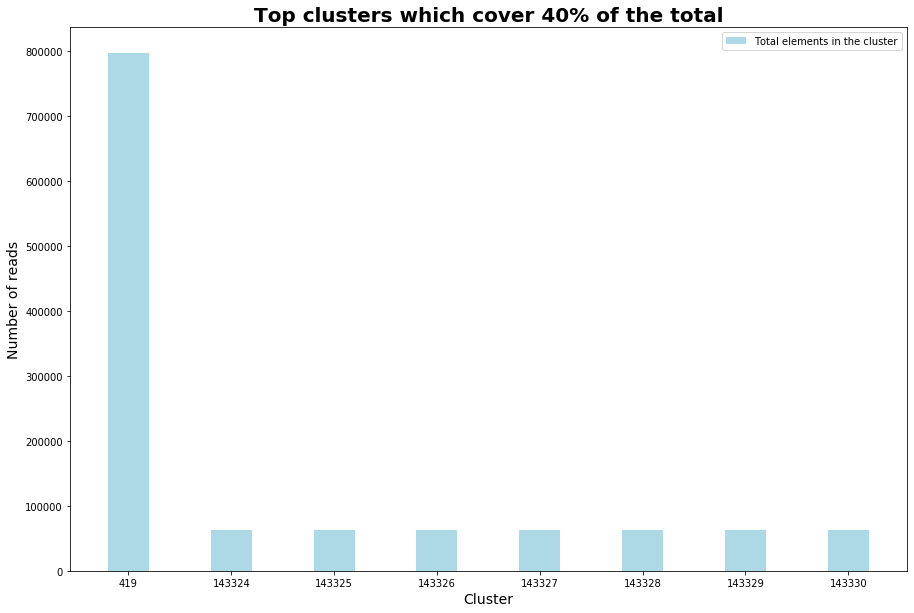

In [61]:
tot_reads = len(l) # number of read clustered
read = 0 # read counter 

cluster_to_show = [] # list of [cluster, cardinality] pairs 

for cluster, cardinality in sorted_dict.items():
    
    read = read + cardinality
    
    if read / tot_reads * 100 <= threshold:
        cluster_to_show.append([cluster, cardinality])
        
    else:
        break

print("len of cluster_to_show list: ", len(cluster_to_show))
print("cluster_to_show list:")
print(cluster_to_show)

plotALot(cluster_to_show,threshold)

#in this way I can show clusters which cover the "threshold" part of the entire reads.

In [62]:
import csv

with open('clustering.csv', 'w', newline='') as csvfile:
    fieldnames = ['cluster_index', 'cardinality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for cluster, cardinality in cluster_dict.items():
        writer.writerow({'cluster_index': cluster, 'cardinality': cardinality})

In [63]:
import pandas as pd
import numpy as np

In [64]:
# Read in data and examine first 10 rows
single20 = pd.read_csv('single20clustering.csv')

single25 = pd.read_csv('single25clustering.csv')

paired20 = pd.read_csv('paired20clustering.csv')

paired25 = pd.read_csv('paired25clustering.csv')

paired40 = pd.read_csv('paired40clustering.csv')

#clustering.head(max_val)

Text(0, 0.5, 'cardinality')

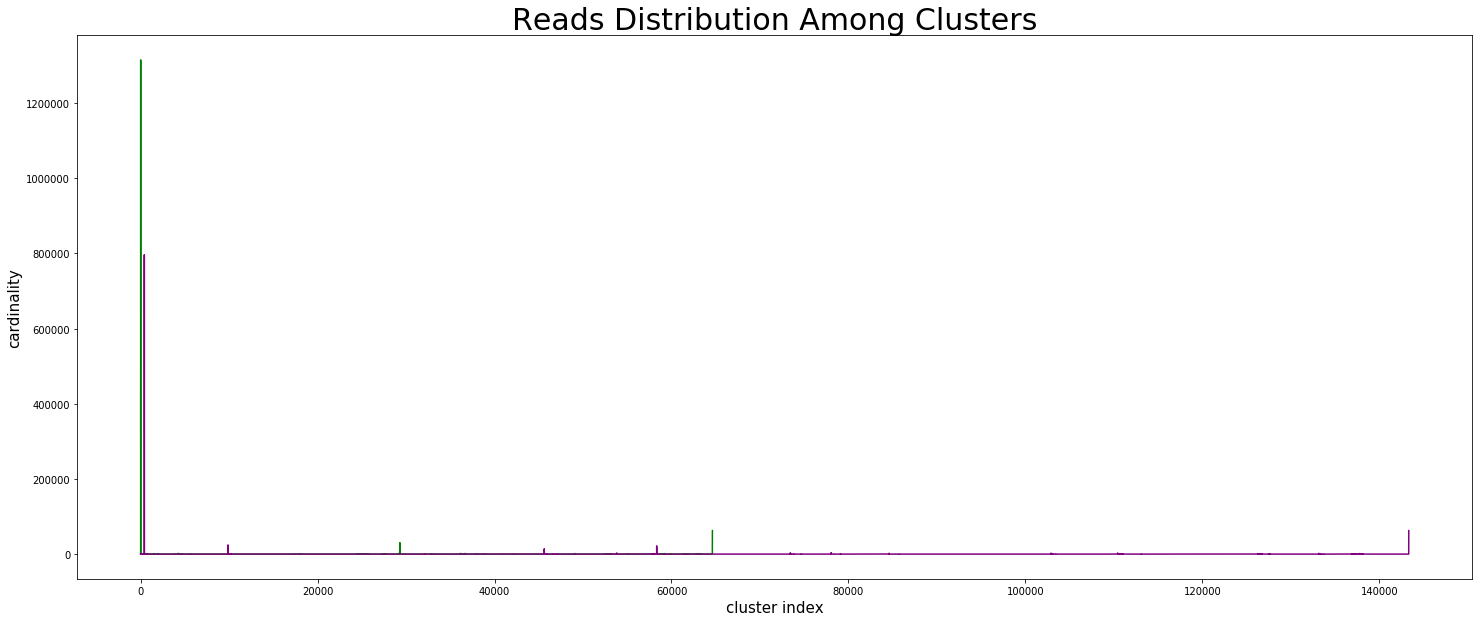

In [65]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
plt.plot(paired40['cardinality'], color = 'purple')

plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)




Text(0, 0.5, 'cardinality')

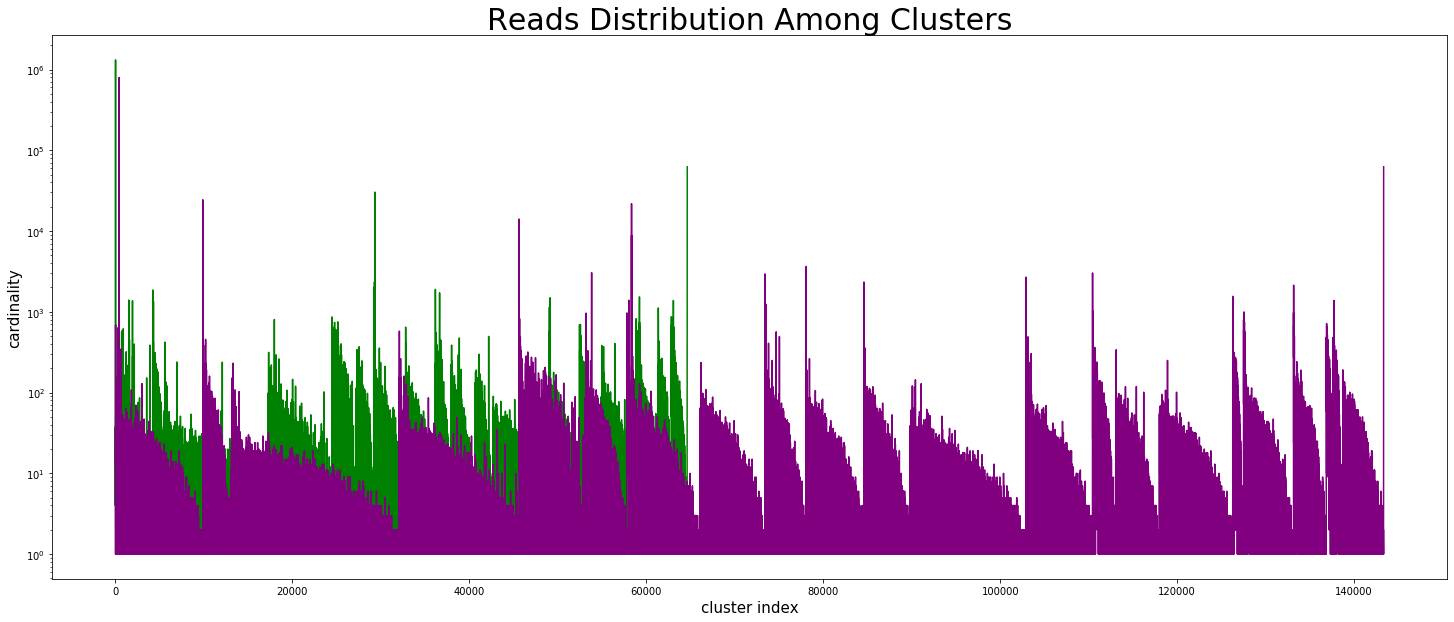

In [66]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
plt.plot(paired40['cardinality'], color = 'purple')

plt.yscale('log')
plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)

